# **Predicting the Pulse of the London bike Sharing Market: A Google TensorFlow-Enabled Approach**

![DALLE2~1](DALLE2~1.WEB)


# **Project Background**

- In the fluctuating world of London's bike sharing market, predicting demand is a complex challenge, influenced by weather, seasonal trends, and more. Our project aims to transform this challenge into an opportunity using the power of Google TensorFlow. Developed by the Google Brain team, TensorFlow is a beacon of innovation in machine learning, offering unparalleled flexibility and capabilities.

- We're employing Multivariate Time Series Analysis with TensorFlow to decode London's bike demand patterns. This approach not only harnesses TensorFlow's versatile power for data analysis but also applies its vast potential across various applications, from voice recognition to predictive analytics in different sectors.

- Our journey redefines bike demand forecasting, offering new insights for bike enthusiasts, city planners, and strategists. Join us in this pioneering initiative as we unlock the future of urban mobility with advanced analytics and AI.

# Introduction: Revolutionizing Bike Demand Prediction with Google TensorFlow

**Introduction**:

Dive into the ever-changing landscape of London's bike sharing market with our latest series, 'Google TensorFlow AI/ML Applications,' on Medium. Join us on an enlightening journey as we navigate through this dynamic terrain, harnessing the transformative power of TensorFlow, Google's pinnacle of innovation in Machine Learning.

**The Challenge**:

The task of predicting the demand for London's bike-sharing services is like steering through a stormy sea, with constant shifts and unpredictable elements at play. Artificial Intelligence (AI), and more specifically, Google TensorFlow, emerges as our lighthouse in this turbulent ocean, offering unmatched precision and efficiency in forecasting demand.

**Introducing Tensorflow**:

In this series, we delve deep into the world of TensorFlow. Crafted by the minds at Google Brain, it stands as a monument to progress in machine learning, providing exceptional versatility and capabilities. TensorFlow isn't just a tool; it's the key to democratizing advanced analytics and revolutionizing our approach to predicting London's bike demand.

**Join the Journey**:

This adventure transcends technological exploration—it's an odyssey of discovery where data intertwines with sophisticated algorithms. I warmly invite you to accompany me in demystifying the complexities of bike-sharing economics and uncovering the groundbreaking potential of TensorFlow in the realm of demand prediction.

# Project Approach

![ML project life cycle ](ML%20project%20life%20cycle%20.png)


A successful Machine learning project includes project scoping, data collection and preprocessing, modeling, evaluation, and deployment. For this project, we will focus on scoping, data collection and preprocessing, and modeling for predicting diamond prices using Traditional Regression methods (ANN) and using AutoML (AutoKeras)

During the scoping phase, we will define objectives, identify target variables, and determine data sources and constraints.

In the data collection and preprocessing phase, we will gather relevant data from various sources such as historical diamond prices, economic indicators, and weather data. We will clean and preprocess the data, handling missing values, outliers, and performing feature engineering.

The modeling phase involves applying machine learning algorithms to train and build predictive models. We will leverage AutoKeras, an AutoML tool, to automate model selection and hyperparameter tuning.

By expanding our project to include these phases, we ensure a comprehensive approach to predicting petrol prices using AutoKeras, contributing to the understanding of diamond markets.

# Methodology Unveiled: Steering Bike Demand Forecasting with Google TensorFlow

TensorFlow framework developed by the Google Brain team, is a beacon of innovation in machine learning, offering unparalleled flexibility and capabilities

Here I have used Tensroflow whichis an open-source library for machine learning and artificial intelligence.TensorFlow excels in numerical computation, which makes it ideal for deep learning applications, but it's also flexible enough for a broad spectrum of data-driven applications. Its open-source nature allows developers and researchers around the world to contribute to its development and use it for both commercial and research purposes.

# Process: Charting the Course

My journey in the Jupyter Notebook was both illuminating and rigorous:
- **Define the Project**: It starts with understanding the business problem.
- **Data Collection & Understanding**: Gathering and grasping the dataset's intricacies.
- **Data Preprocessing**: The bedrock of the analysis - cleansing and structuring data for machine comprehension.
- **Feature Engineering & Selection**: Identifying the most informative attributes.
- **Model Selection**: Auto-Sklearn assumes command here, sifting through algorithms to find our star performer.
- **Evaluation**: Beyond celebrating the model AutoML selects, we subject it to thorough scrutiny, examining its accuracy, precision, recall, and more.

## Step 1: Import Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

## Step 2: Data Preparation

In [2]:
#Load the data 
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'], index_col = 'timestamp')

In the above, we have used the timestamp column as date rather than object.

In [3]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [4]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


## Step 3: Checking for Seasonality

Now we will check if all columns in our analysis are stationary. A statinary series is one in which the properties - mean, variance, covariance do not vary with time.

In [6]:
# Checking for stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [7]:
johan_test_temp = df

In [8]:
coint_johansen(johan_test_temp, -1, 1).eig

array([2.61219379e-01, 1.31970167e-01, 5.22046139e-02, 4.19830465e-02,
       2.10126207e-02, 1.75450605e-02, 1.36518877e-02, 6.26085775e-04,
       7.56291478e-05])

For a series to be stationary, the eigenvalues should be < 1 in modulus.

From the above we can clearly see that all eigenvalues are < 1 indicating that all the time series under test are stationary. If we would have found any of the eigenvalues > 1 then we would have examine the list to check which one causing the problem by doing further deep dive.

## Step 4: Data Exploration

Now we will explore few feature columns and the target value to understand its distribution.

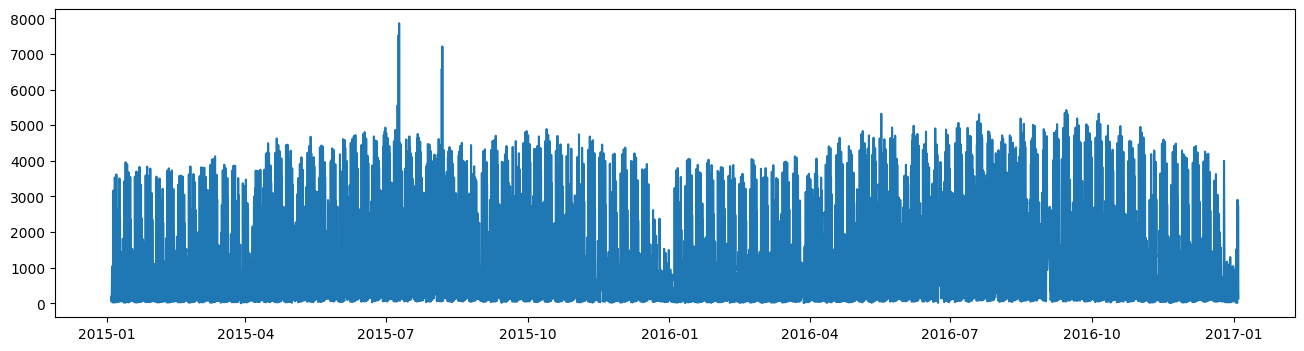

In [9]:
plt.figure(figsize= (16,4))
plt.plot(df.index, df['cnt'])

From the above we can observe that demand is distrubuted throughout the entire period.

In [10]:
# Now we will check for any seasonal changes in the demand distribution.

# create indexes
df['hour'] = df.index.hour
df['month'] = df.index.month

<AxesSubplot: xlabel='month', ylabel='cnt'>

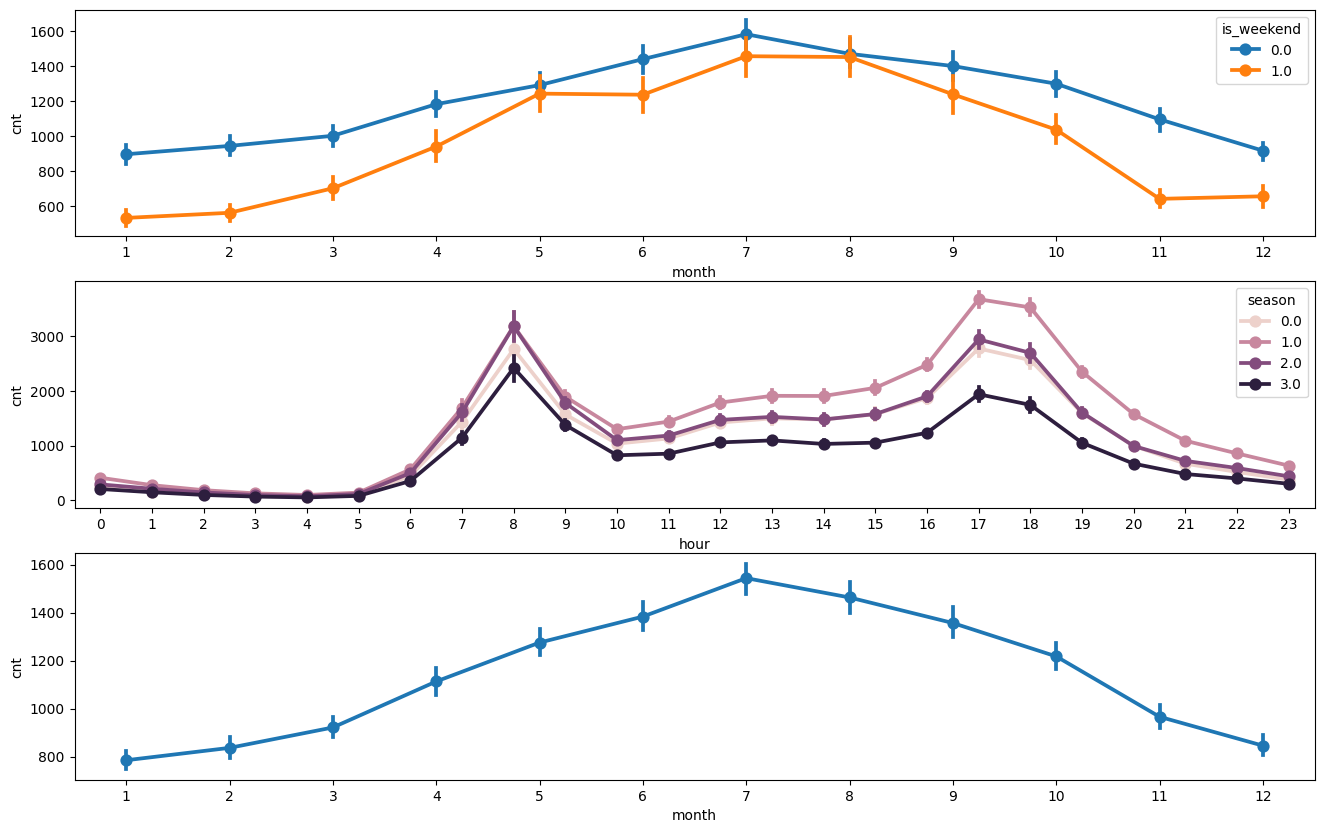

In [11]:
# Let's create 3 plots to obsereve the weekend, holiday, seasonal demands

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_size_inches(16,10)

sns.pointplot(data=df, x='month', y='cnt', hue='is_weekend', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax2 )
sns.pointplot(data=df, x='month', y='cnt', ax=ax3)


From first graoh above, we can see that bike share aggregated over for each month of the year during the weekends and week days. Demand is more during the month of the July every year irrespective of whether its a weekend or not. 

Second chart shows that during every seasob we observe that the demand is more during the morning 8am and evening 5pm-6pm time periods.

Third chart shows that aggregated monthly demand irresoective of the weekend, holiday or seasons. This shows that the demand is more during the month of July and is lowest during Jan-Dec periods of the year.

## Step 5: Data Preparation

we will scale all the numeric columns by using MinMaxScaler

In [12]:
# Scaling numeric columns

scaler = sklearn.preprocessing.MinMaxScaler()
df['t1'] = scaler.fit_transform(df['t1']. values.reshape(-1,1))
df['t2'] = scaler.fit_transform(df['t2'].values.reshape(-1,1))
df['hum'] =scaler.fit_transform(df['hum'].values.reshape(-1,1))
df['wind_speed'] = scaler.fit_transform(df['wind_speed'].values.reshape(-1,1))
df['cnt'] = scaler.fit_transform(df['cnt'].values.reshape(-1,1))

from the above we can observe that we have eliminated the columns holding categorical and bololean values from this preprocessing.

In [13]:
# we will use 90% data for training

train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size: len(df)]

Now we will create tensors for inputting data to our neural network. We will write a function called create_dataset that we will use for both training and testing datasets

In [14]:
def create_dataset(X, Y, time_steps =1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

With the sequence of length 10 we will create training and testing datasets now


In [15]:
def create_dataset(X, Y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(Y.iloc[i+time_steps])  # Corrected from 'y' to 'Y' to match the function parameter
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

Now we will slice datasets and create batches of data for an improved training

In [16]:
batch_size = 256
buffer_size = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

2024-02-23 22:20:48.636923: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(batch_size).repeat()

## Step 6: Model Creation

In [18]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(8, input_shape=X_train.shape[-2:]), tf.keras.layers.Dense(1)])

simple_lstm_model.compile(optimizer= 'adam', loss= 'mae')

## Step 7: Model Training

In [19]:
EVALUATION_INTERVAL = 200
EPOCHS =10

history = simple_lstm_model.fit(train_data,epochs=EPOCHS,steps_per_epoch= EVALUATION_INTERVAL, validation_data = test_data, validation_steps = 50)


Epoch 1/10
200/200 [==============================] - 2s 6ms/step - loss: 0.2754 - val_loss: 0.1045
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0806 - val_loss: 0.0759
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0676 - val_loss: 0.0556
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0613 - val_loss: 0.0567
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0542 - val_loss: 0.0480
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0475 - val_loss: 0.0443
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0435 - val_loss: 0.0401
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0417 - val_loss: 0.0395
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0404 - val_loss: 0.0442
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0390 - val_loss: 0.0389

Now we will plot the loss curves

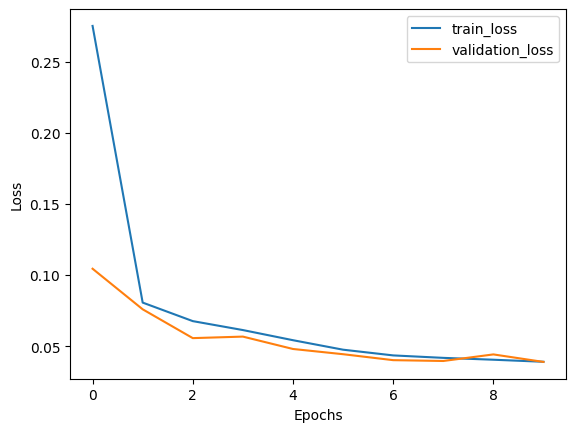

In [20]:
# Plot losses

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



From the above we can see that the losses start flattening out after 3rd epoch. No overfitting is observed here. So we are satisfued with model training. Next step will be to evaluate the model performance on the test data.

## Step 8: Model Evaluation

In [21]:
X_test, y_test = create_dataset(df, df.cnt, 10)
y_pred = simple_lstm_model.predict(X_test)

544/544 [==============================] - 1s 1ms/step


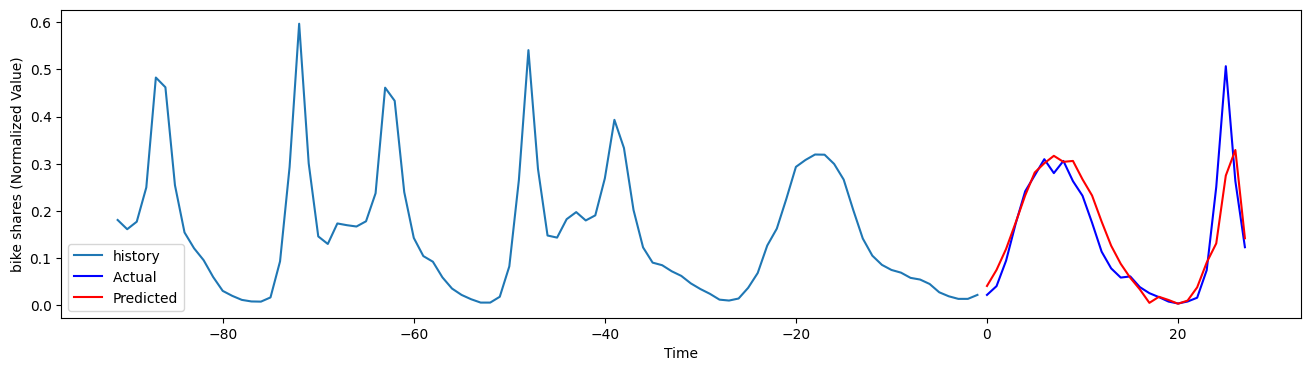

In [22]:
# Now we will plot our predictions to get some visualization

def create_time_steps(length):
    return list(range(-length, 0))

plt.figure(figsize=(16,4))
num_in = create_time_steps(91)
num_out = 28
plt.plot(num_in,y_train[15571:],label='history')
plt.plot(np.arange(num_out),y_test[15661:15689], 'b',label='Actual ')
plt.plot(np.arange(num_out),y_pred[15661:15689], 'r',label='Predicted')
plt.xlabel("Time")
plt.ylabel("bike shares (Normalized Value)")
plt.legend()
plt.show()
     
                      
                      
                      

Above graoh shows Actual Vs Predictions on Bike share

## Step 9: Predicting Future Point

In [23]:
y_pred = simple_lstm_model.predict(X_test[-1:])

1/1 [==============================] - 0s 14ms/step


In [24]:
print(y_pred)

[[0.02891095]]


Here we are predicting the next bike share count in future

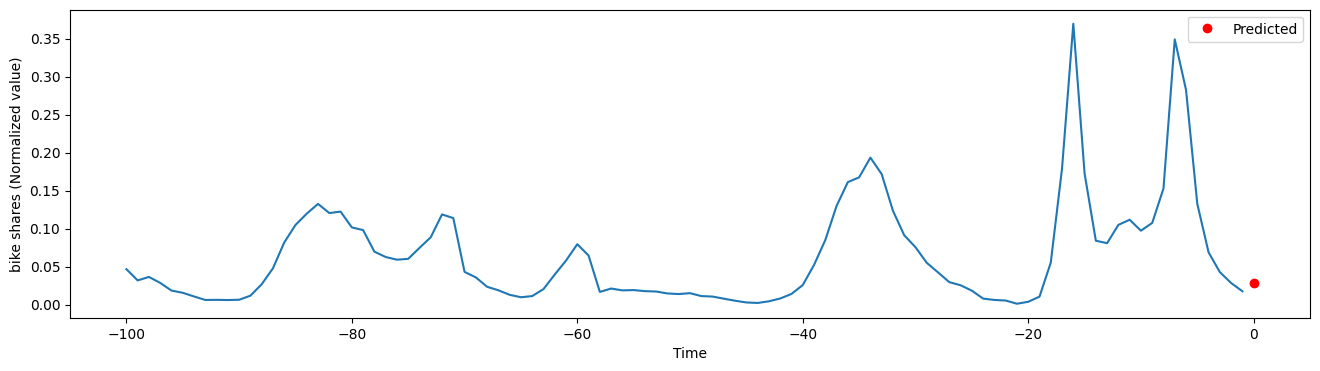

In [26]:
# Plot prediction to get visualization on where the data point fits

plt.figure(figsize= (16,4))
num_in = create_time_steps(100)
num_out = 1
plt.plot(num_in, y_test[-100:])
plt.plot(np.arange(num_out), y_pred, 'ro',label='Predicted')
plt.xlabel('Time')
plt.ylabel('bike shares (Normalized value)')
plt.legend()
plt.show()



From the above, we can see that our prediction for future data point looks good.

## Step 10: Predicting Range of Data Points

Our last data point in the test set is for Jan 3 2017 23:00:00. We would like to predict the demand for Jan 4 2017 00:00:00 onwards for the next 100 points on hourly basis.

In [27]:
# we will pick up first few entries from the test dataset
df2 = df['2017-01-03 14:00:00': '2017-01-03 23:00:00']

# Now we will pick up features data from our original dataset during the last year
df1 = df['2016-01-04 00:00:00': '2016-01-06 23:00:00']

df1['cnt'] = 0

df_future = df2.append(df1, sort = False)

df_future

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month
timestamp,,,,,,,,,,,
2017-01-03 14:00:00,0.097328,0.211268,0.2000,0.666667,0.389381,3.0,0.0,0.0,3.0,14,1
2017-01-03 15:00:00,0.107506,0.211268,0.2000,0.635220,0.477876,4.0,0.0,0.0,3.0,15,1
2017-01-03 16:00:00,0.152799,0.211268,0.2000,0.635220,0.460177,4.0,0.0,0.0,3.0,16,1
2017-01-03 17:00:00,0.348855,0.211268,0.2000,0.666667,0.371681,3.0,0.0,0.0,3.0,17,1
2017-01-03 18:00:00,0.282443,0.183099,0.1750,0.761006,0.389381,2.0,0.0,0.0,3.0,18,1
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06 19:00:00,0.000000,0.239437,0.3000,0.874214,0.123894,2.0,0.0,0.0,3.0,19,1
2016-01-06 20:00:00,0.000000,0.239437,0.3000,0.836478,0.115044,2.0,0.0,0.0,3.0,20,1
2016-01-06 21:00:00,0.000000,0.211268,0.2625,0.911950,0.115044,2.0,0.0,0.0,3.0,21,1


In [30]:
# For the sake of simplicity we will drop the index with the following statement:

df_future = df_future.reset_index(drop=True)

Now we will do the predictions in a  continuos loop everytime adding the predicted value to the df_future dataframe

In [32]:
# Make predictions ina  loop everytime adding the last prediction

predictions = []
for i in range(50):
    X_f, y_f = create_dataset(df_future, df_future.cnt, time_steps)
    y_pred = simple_lstm_model.predict(X_f[i:i+1])
    df_future['cnt'][i+10] = y_pred
    predictions.append(float(y_pred[0][0]))

1/1 [==============================] - 0s 12ms/step


In [33]:
predictions

[0.010427333414554596,
 0.02044770121574402,
 0.014942862093448639,
 0.005215894430875778,
 0.014987558126449585,
 0.047161273658275604,
 0.09360408037900925,
 0.1366378664970398,
 0.14788922667503357,
 0.11627481132745743,
 0.0572671964764595,
 0.06895548850297928,
 0.101935975253582,
 0.10560070723295212,
 0.09550925344228745,
 0.13480573892593384,
 0.13307303190231323,
 0.12279466539621353,
 0.11411792784929276,
 0.10577002912759781,
 0.09903842955827713,
 0.07706857472658157,
 0.053716666996479034,
 0.03883609175682068,
 0.01895316317677498,
 0.01209539920091629,
 0.005675971508026123,
 0.00884111225605011,
 0.034691326320171356,
 0.04666978865861893,
 0.08803407102823257,
 0.1285400688648224,
 0.14241278171539307,
 0.10020973533391953,
 0.03778915852308273,
 0.058235399425029755,
 0.09033743292093277,
 0.12042710930109024,
 0.13464570045471191,
 0.13723793625831604,
 0.1361483633518219,
 0.12748309969902039,
 0.11374332755804062,
 0.091942198574543,
 0.09422240406274796,
 0.078638

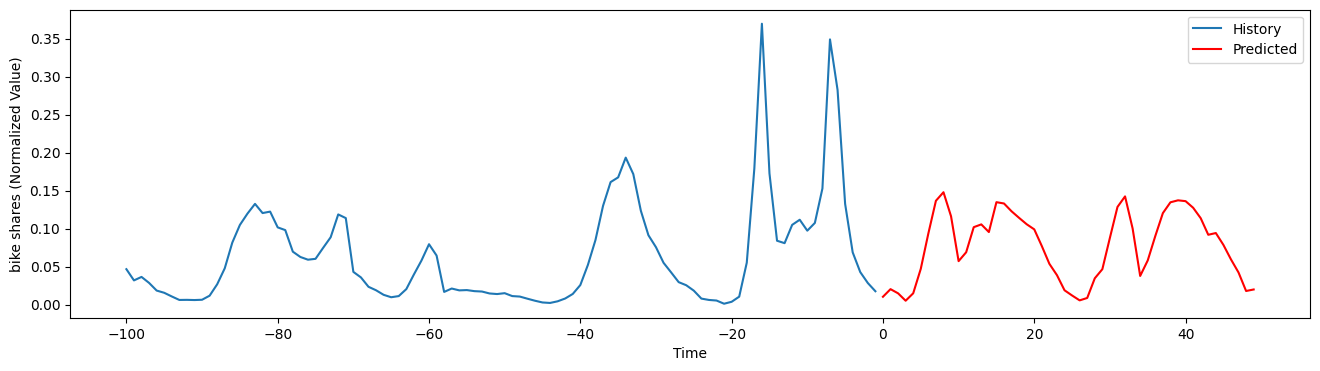

In [34]:
# Now lets visualize the predictions by creating a plot 

plt.figure(figsize=(16,4))
num_in = create_time_steps(100)
num_out = 50
plt.plot(num_in,y_test[-100:],label='History')
plt.plot(np.arange(num_out),predictions, 'r',label='Predicted')
plt.xlabel("Time")
plt.ylabel("bike shares (Normalized Value)")
plt.legend()
plt.show()
     

From the above we can clearly see on how to create a deep neural network model for a multivariate time series analysis.

## Step 11: Conclusion

- In this project we learned how to use neural networks in modelling multivariate time series.

- In multivariate time series, there are multiple dependent variables (ex: wind_speed, hum, t1, t2 etc) on which target value (bike shares) depends . 

- Although there are widely accepted statistical techniques available for our use, with the advent of neural networks , it saves us lot of time and efforts in learning the theoretical part of these statistical models and implementing those in the code.

- Neural networks allow us to implement such models with ease and allow us to play aroud with different configurations to experiment on our data to achieve acceptable level of perofrmance.